In [189]:
# Add this project to the path
import os; import sys; currDir = os.path.dirname(os.path.realpath("__file__"))
rootDir = os.path.abspath(os.path.join(currDir, '..')); sys.path.insert(1, rootDir + "/src")

# Imports and options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Extract
df = pd.read_csv("../data/interim/train.csv")



In [190]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,admin.,married,university.degree,no,yes,no,cellular,dec,thu,1,999,0,nonexistent,-3.0,92.713,-33.0,0.707,5023.5,1
1,71,retired,married,high.school,no,yes,no,cellular,apr,wed,2,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,0
2,52,blue-collar,divorced,high.school,no,no,no,telephone,jun,wed,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
3,49,technician,single,university.degree,unknown,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
4,22,admin.,single,university.degree,no,yes,no,cellular,sep,mon,2,999,3,failure,-1.1,94.199,-37.5,0.882,4963.6,1


In [191]:
df['y'].value_counts(normalize=True)

0    0.888191
1    0.111809
Name: y, dtype: float64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32940 entries, 0 to 32939
Data columns (total 20 columns):
age               32940 non-null int64
job               32940 non-null object
marital           32940 non-null object
education         32940 non-null object
default           32940 non-null object
housing           32940 non-null object
loan              32940 non-null object
contact           32940 non-null object
month             32940 non-null object
day_of_week       32940 non-null object
campaign          32940 non-null int64
pdays             32940 non-null int64
previous          32940 non-null int64
poutcome          32940 non-null object
emp.var.rate      32940 non-null float64
cons.price.idx    32940 non-null float64
cons.conf.idx     32940 non-null float64
euribor3m         32940 non-null float64
nr.employed       32940 non-null float64
y                 32940 non-null int64
dtypes: float64(5), int64(5), object(10)
memory usage: 5.0+ MB


In [193]:
for column in df.select_dtypes("O").columns:
    print("\n", column, "\n\n", df[column].value_counts())


 job 

 admin.           8273
blue-collar      7466
technician       5388
services         3175
management       2303
retired          1357
entrepreneur     1169
self-employed    1139
housemaid         862
unemployed        836
student           707
unknown           265
Name: job, dtype: int64

 marital 

 married     19994
single       9211
divorced     3665
unknown        70
Name: marital, dtype: int64

 education 

 university.degree      9650
high.school            7675
basic.9y               4851
professional.course    4160
basic.4y               3397
basic.6y               1835
unknown                1356
illiterate               16
Name: education, dtype: int64

 default 

 no         26009
unknown     6929
yes            2
Name: default, dtype: int64

 housing 

 yes        17211
no         14918
unknown      811
Name: housing, dtype: int64

 loan 

 no         27123
yes         5006
unknown      811
Name: loan, dtype: int64

 contact 

 cellular     20885
telephone    12055


In [194]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000,32940.000000
mean,39.990680,2.572495,962.403127,0.173194,0.086485,93.578177,-40.506755,3.624456,5167.147395,0.111809
std,10.386832,2.791226,187.090745,0.496166,1.569459,0.578273,4.618878,1.734086,72.251862,0.315137
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Duplicates are fine because clients can be messaged more than once.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127963048>,
      dtype=object)

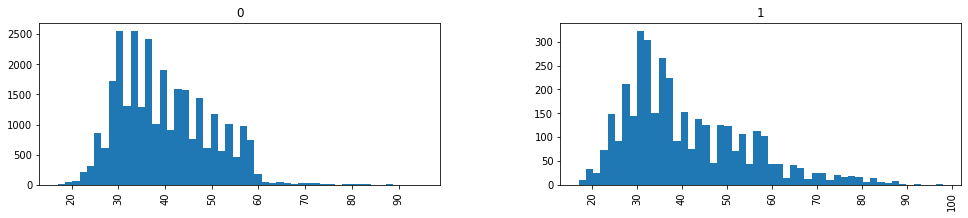

In [195]:
df.hist(column="age", by="y", figsize=(16,3), bins=50)

Clients older than 60 are much more likely to make the investment

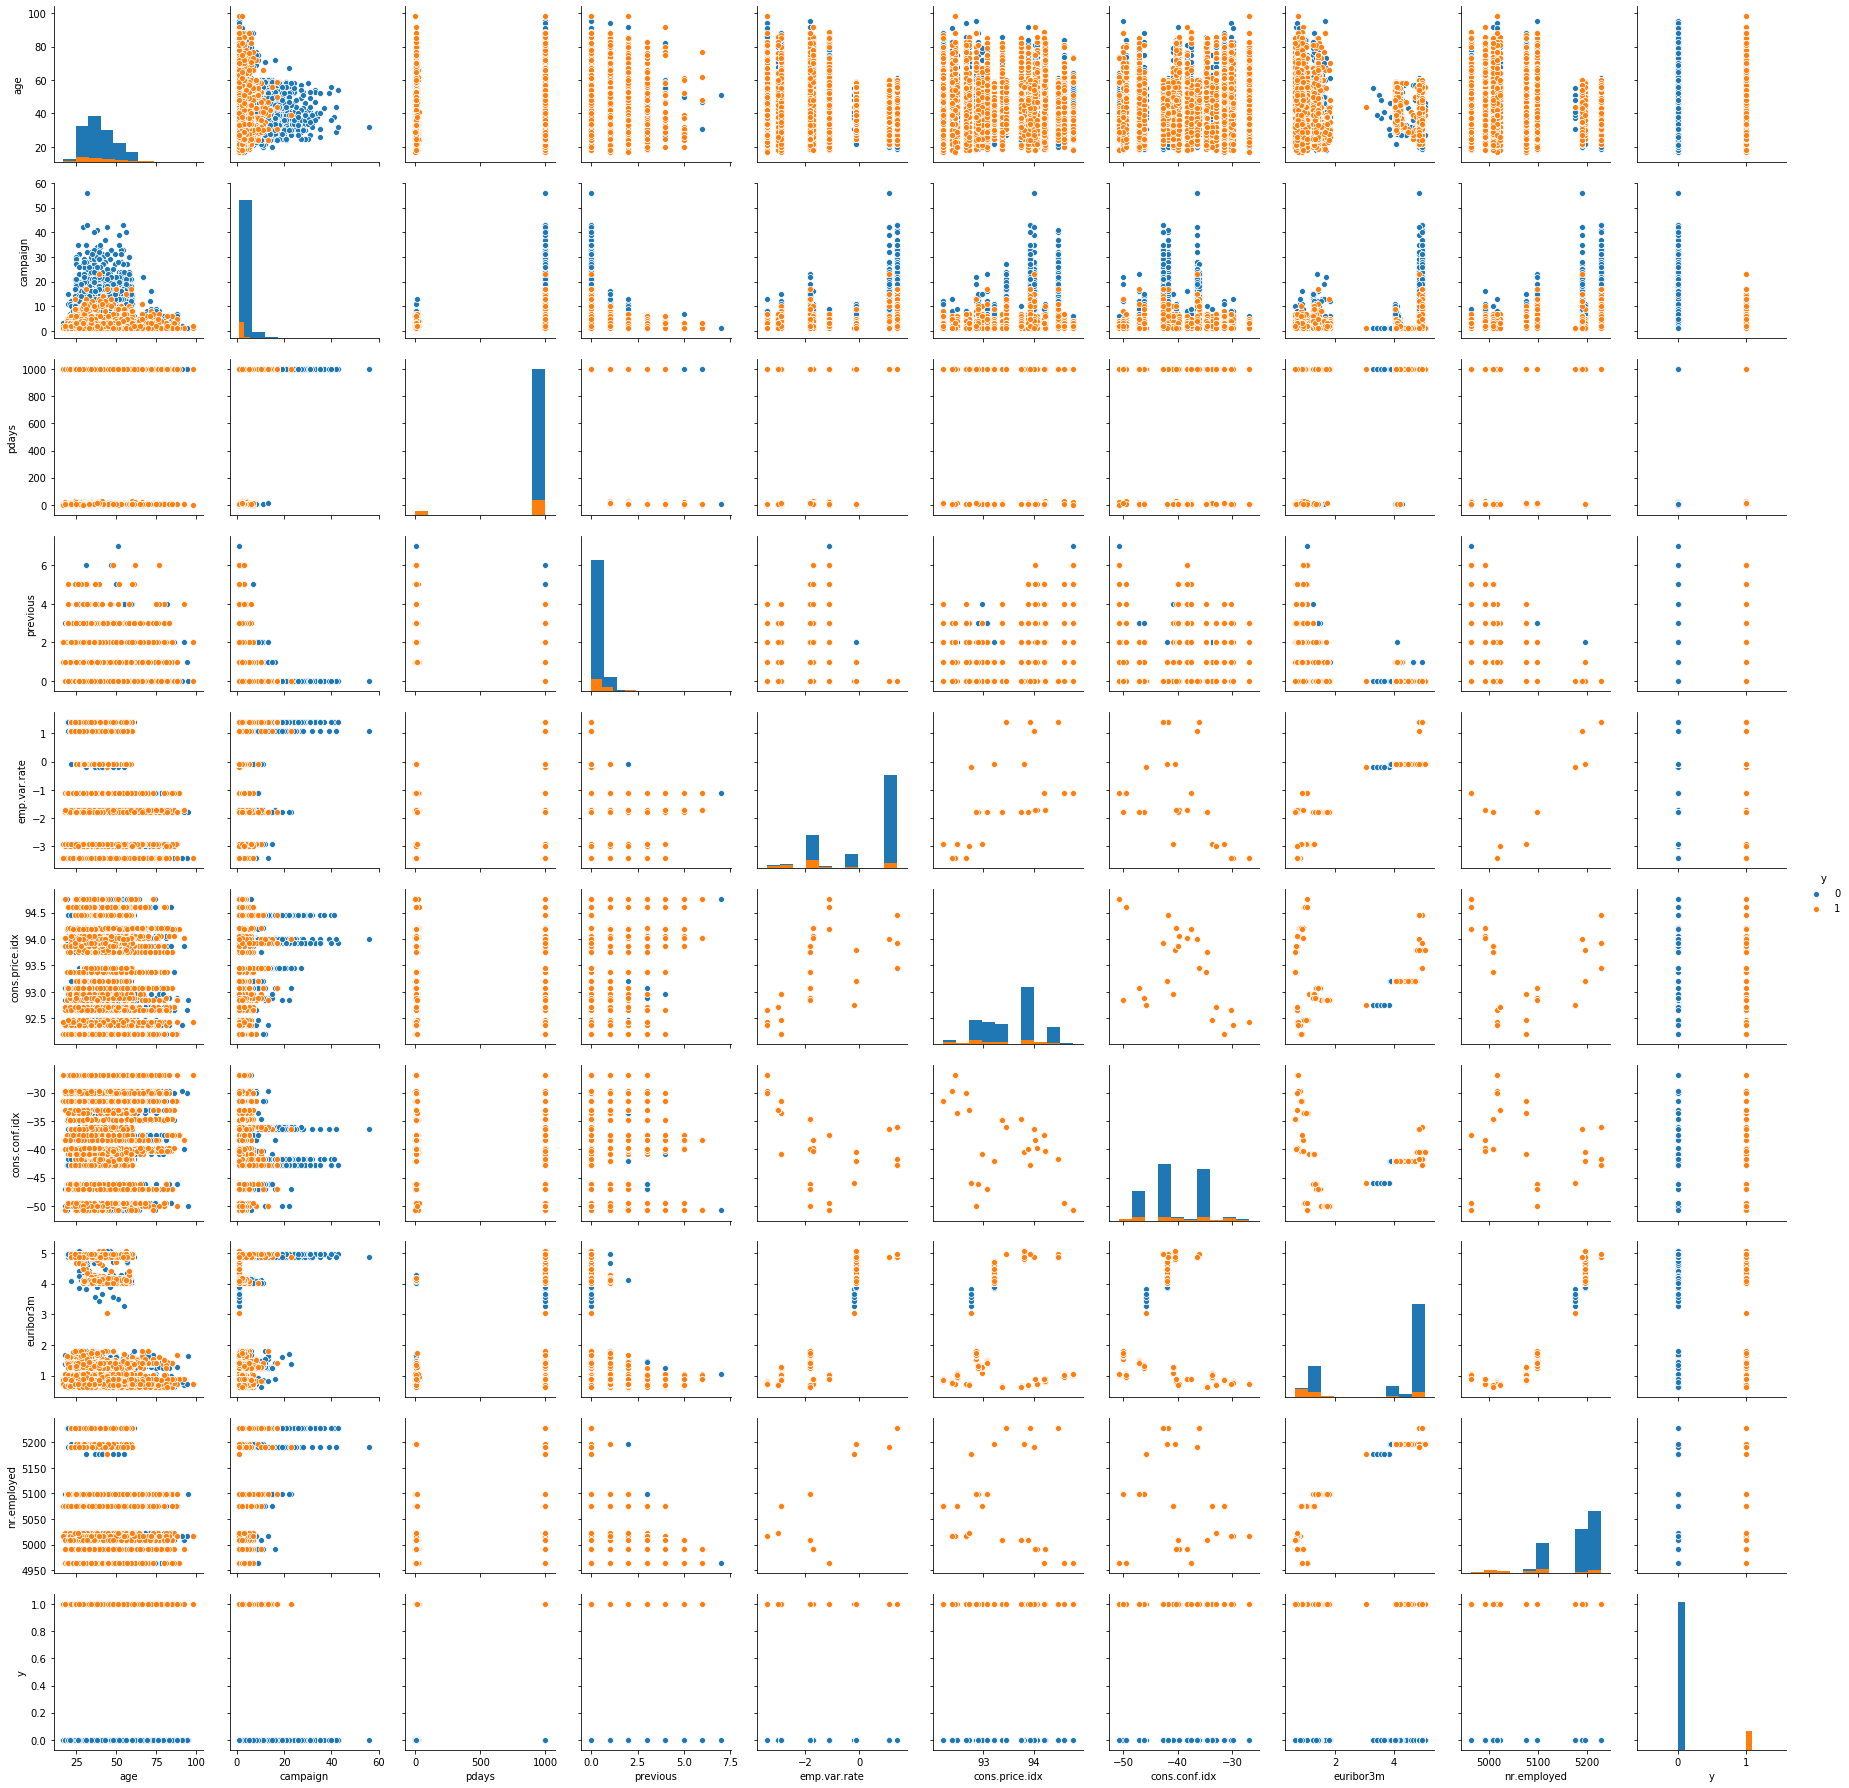

In [145]:
sns.pairplot(df, hue="y", diag_kind="hist")


Most separation:
- old age (60+): a yes more often than average
- 15+ contacts this campaign: very often a no
- pdays low: a large proportion of yes
- previous 2.0: possibly a large proportion of yes
- emp.var.rate < -1: more likely a yes 
- emp.var.rate > -1: more likely a no
- cons.price.index: possibly more yes for low values
- cons.conf.index: might be positively correlated with cons.price.index
- euibor3m low value: more likely a yes 
- euibor3m high value: more likely a no
- nr.employed low value: more likely a yes 
- nr.employed high value: more likely a no


In [197]:
temp = df.copy()
for col in ['default', 'housing', 'loan']:
    temp[col] = temp[col].apply(lambda x: 1 if x == "yes" else 0 if x == "unknown" else -1 if x =="no" else -2)
corr_matrix = temp.corr()
corr_matrix['y'].sort_values(ascending=False)

y                 1.000000
previous          0.231272
cons.conf.idx     0.055594
age               0.027948
housing           0.011991
loan             -0.004271
campaign         -0.064490
default          -0.098079
cons.price.idx   -0.139848
emp.var.rate     -0.298606
euribor3m        -0.307032
pdays            -0.324359
nr.employed      -0.352043
Name: y, dtype: float64

Comparing correlation to observations above:
- previous: correlation sign shows as expected, higher values are positively correlated 
- cons.conf.idx: opposite correlation was expected, perhaps there is a nonlinear relationship
- age: correlation sign shows as expected, small value.  Perhaps the greatest separation is among age 60+ which is a minority of the data.
- campaign: nothing of interest before, has one of the lowest absolute value correlations
- cons.price.idx, emp.var.rate, euribor3m, nr.employed have expected correlation sign, should see if some of these are correlated with each other and which can be removed
- pdays has the expected correlation sign
- default has a positive correlation

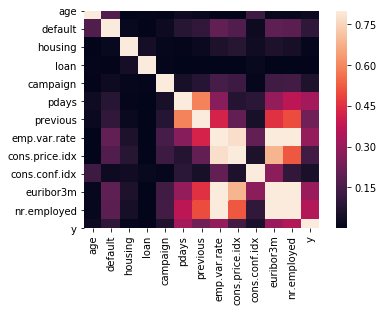

In [201]:
cor_mat = temp.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)


emp.var.rate, euribor3m, and nr.employed are highly correlated.  I prefer to drop all but the one highest correlated with y, which is nr.employed

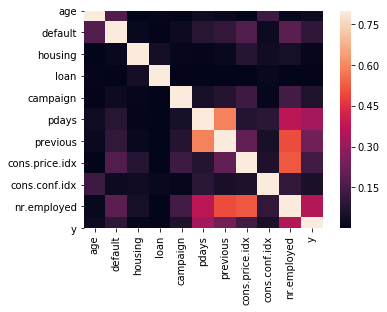

In [229]:
# Dropping columns (Added to pipeline as well)
df.drop(["euribor3m", "emp.var.rate"], axis=1, inplace=True)
temp.drop(["euribor3m", "emp.var.rate"], axis=1, inplace=True)

# Correlation
cor_mat = temp.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)


That's much better, no attributes are very highly correlated with each other.

Now I'll check some categorical variables that could easily be numeric variables.

In [204]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,41,admin.,married,university.degree,no,yes,no,cellular,dec,thu,1,999,0,nonexistent,92.713,-33.0,5023.5,1
1,71,retired,married,high.school,no,yes,no,cellular,apr,wed,2,999,0,nonexistent,93.075,-47.1,5099.1,0
2,52,blue-collar,divorced,high.school,no,no,no,telephone,jun,wed,2,999,0,nonexistent,94.465,-41.8,5228.1,0
3,49,technician,single,university.degree,unknown,yes,no,telephone,may,wed,1,999,0,nonexistent,93.994,-36.4,5191.0,0
4,22,admin.,single,university.degree,no,yes,no,cellular,sep,mon,2,999,3,failure,94.199,-37.5,4963.6,1


In [275]:
def get_expected_bank_balance_by_age(age):
    balance = 0
    if age < 35:
        balance = 4000
    elif age <= 44:
        balance = 6000
    elif age <= 54:
        balance = 9000
    elif age <= 64:
        balance = 10000
    elif age <= 74:
        balance = 16000
    else:
        balance = 12000
    return balance

def get_education_level(education):
    education_level = 0
    if education == "illiterate":
        education_level = 0
    elif education == "basic.4y":
        education_level = 1
    elif education == "basic.6y":
        education_level = 2   
    elif education == "basic.9y":
        education_level = 3
    elif education == "high.school":
        education_level = 4
    elif education == "professional.course":
        education_level = 6      
    elif education == "university.degree":
        education_level = 8
    else:
        education_level = 4
    return education_level

def get_expected_income(job, age):
    beginner_income = 0
    expert_income = 0
    income = 0
    if job == 'admin.':
        beginner_income = 32500
        expert_income = 64000
    elif job == 'blue-collar':
        beginner_income = 22000
        expert_income = 50000
    elif job == 'technician':
        beginner_income = 25000
        expert_income = 55000   
    elif job == 'services':
        beginner_income = 34000
        expert_income = 55000   
        
    elif job == 'management':
        beginner_income = 45000
        expert_income = 122000   
    elif job == 'retired':
        beginner_income = 10000
        expert_income = 10000 
    elif job == 'entrepreneur':
        beginner_income = 25000
        expert_income = 50000 
    elif job == 'self-employed':
        beginner_income = 25000
        expert_income = 50000   
    elif job == 'housemaid':
        beginner_income = 19000
        expert_income = 30000         
    elif job == 'unemployed':
        beginner_income = 0
        expert_income = 0           
    elif job == 'student':
        beginner_income = 0
        expert_income = 0           
    elif job == 'unknown':
        beginner_income = 25000
        expert_income = 35000
    
    income_range = expert_income - beginner_income
    
    if age <= 19:
        income = beginner_income
    elif age <= 24:
        income = beginner_income + 0.22 * income_range
    elif age <= 34:
        income = beginner_income + 0.65 * income_range
    elif age <= 44:
        income = beginner_income + 0.97 * income_range
    elif age <= 54:
        income = beginner_income + 1.00 * income_range
    elif age <= 64:
        income = beginner_income + 0.99 * income_range
    else:
        income = beginner_income + 0.88 * income_range        
    return income
        

def get_expected_bank_balance_by_income(income):
    balance = 0
    if income < 25000:
        balance = 2500
    elif income < 45000:
        balance = 3500
    elif income < 70000:
        balance = 5000
    elif income < 115000:
        balance = 8000
    else:
        balance = 12000
    return balance
       

In [313]:
df['education_level'] = df['education'].apply(get_education_level)
df['expected_income'] = df[['job', 'age']].apply(lambda x: get_expected_income(*x), axis=1)
df['expected_bank_balance_by_income'] = df['expected_income'].apply(get_expected_bank_balance_by_income)
df['expected_bank_balance_by_age'] = df['age'].apply(get_expected_bank_balance_by_age)
df['age_gte_61'] = df['age'].apply(lambda x: x >= 61)
df['age_lte_23'] = df['age'].apply(lambda x: x <= 23)
df.drop(['age'], axis=1, inplace=True)


y                                  1.000000
nr.employed                        0.352043
pdays                              0.324359
previous                           0.231272
age_gte_61                         0.161578
cons.price.idx                     0.139848
age_lte_23                         0.071815
campaign                           0.064490
expected_income                    0.062166
cons.conf.idx                      0.055594
education_level                    0.050789
expected_bank_balance_by_income    0.041680
expected_bank_balance_by_age       0.032872
Name: y, dtype: float64

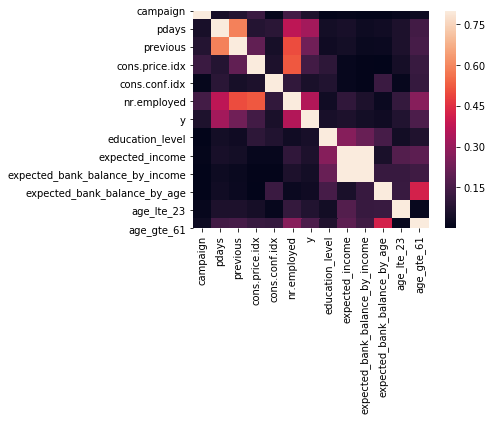

In [314]:
# Correlation
cor_mat = df.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)
cor_mat['y'].sort_values(ascending=False)

- Transformation for either day of week dummies or is_weekend variable
